In [2]:
from PIL import Image
import requests
from io import BytesIO

In [3]:
import pandas as pd

In [6]:
import json

In [8]:
import nasapy

In [12]:
# Convert files to JPEG

import os, sys


#for infile in sys.argv[1:]:
#    f, e = os.path.splitext(infile)
#    outfile = f + ".jpg"
#    if infile != outfile:
#        try:
#            with Image.open(infile) as im:
#                im.save(outfile)
#        except IOError:
#            print("cannot convert", infile)

In [5]:
# Create thumbnail
#
#import os, sys
#from PIL import Image
#
#size = (128, 128)
#
#for infile in sys.argv[1:]:
#    outfile = os.path.splitext(infile)[0] + ".thumbnail"
#    if infile != outfile:
#        try:
#            with Image.open(infile) as im:
#                im.thumbnail(size)
#                im.save(outfile, "JPEG")
#        except IOError:
#            print("cannot create thumbnail for", infile)

In [13]:
#from nasa import apod
os.environ['NASA_API_KEY']='INSERT YOUR KEY HERE'
#picture = apod.apod('2015-05-01')
#picture.url
#picture.title
#picture

In [14]:
response = requests.get(picture.url)
img = Image.open(BytesIO(response.content))

NameError: name 'picture' is not defined

In [15]:
key='INSERT YOUR KEY HERE'
os.environ['NASA_API_KEY']='INSERT YOUR KEY HERE'
nasa = nasapy.Nasa(key=key)

In [16]:
print(nasa.limit_remaining)

None


In [46]:
birthday={'copyright': 'DSS',
 'date': '2019-11-02',
 'explanation': "The Flame Nebula stands out in this optical image of the dusty, crowded star forming regions toward Orion's belt, a mere 1,400 light-years away. X-ray data from the Chandra Observatory and infrared images from the Spitzer Space Telescope can take you inside the glowing gas and obscuring dust clouds though. Swiping your cursor (or clicking the image) will reveal many stars of the recently formed, embedded cluster NGC 2024, ranging in age from 200,000 years to 1.5 million years young. The X-ray/infrared composite image overlay spans about 15 light-years across the Flame's center. The X-ray/infrared data also indicate that the youngest stars are concentrated near the middle of the Flame Nebula cluster. That's the opposite of the simplest models of star formation for the stellar nursery that predict star formation begins in the denser center of a molecular cloud core. The result requires a more complex model; perhaps star formation continues longer in the center, or older stars are ejected from the center due to subcluster mergers.",
 'hdurl': 'https://apod.nasa.gov/apod/image/1405/Flamessc2014-04a_Med.jpg',
 'media_type': 'image',
 'service_version': 'v1',
 'title': 'Inside the Flame Nebula',
 'url': 'https://apod.nasa.gov/apod/image/1405/flame_optical.jpg'}

In [49]:
url=birthday['url']

In [50]:
response = requests.get(url)
img = Image.open(BytesIO(response.content))

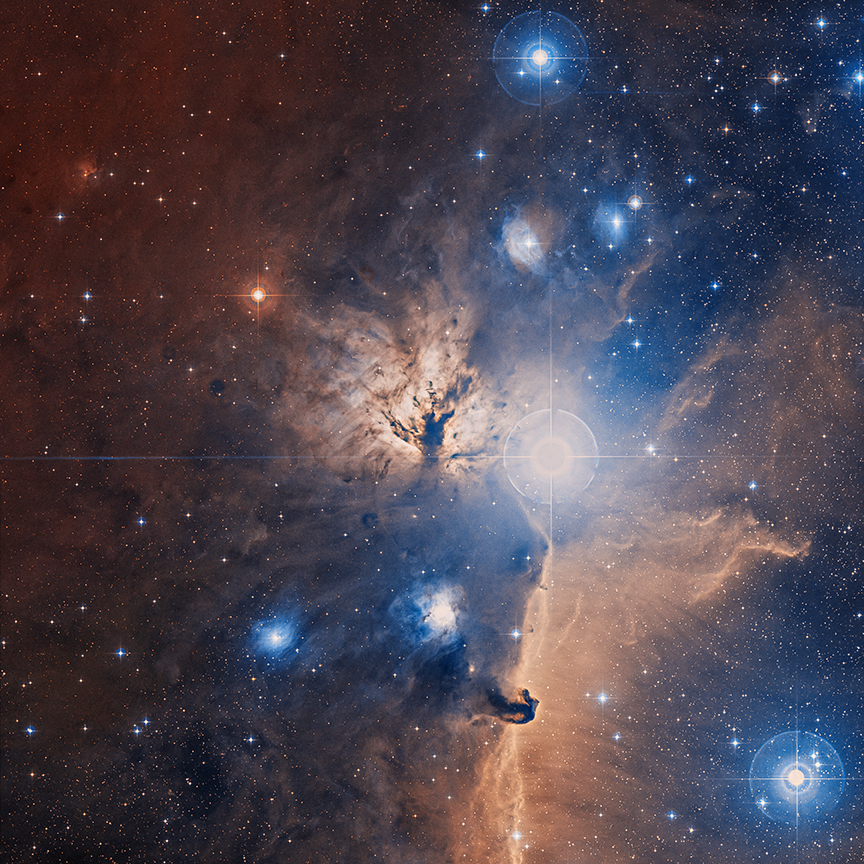

In [51]:
img

In [17]:
search_planet='https://images-api.nasa.gov/search?q=planet&media_type=image'
search_nebula='https://images-api.nasa.gov/search?q=nebula&media_type=image'

In [18]:
responses={}

In [19]:
for i in range(1,60):
    responses[i]=requests.get(search_planet+"&page="+str(i))

In [20]:
responses

{1: <Response [200]>,
 2: <Response [200]>,
 3: <Response [200]>,
 4: <Response [200]>,
 5: <Response [200]>,
 6: <Response [200]>,
 7: <Response [200]>,
 8: <Response [200]>,
 9: <Response [200]>,
 10: <Response [200]>,
 11: <Response [200]>,
 12: <Response [200]>,
 13: <Response [200]>,
 14: <Response [200]>,
 15: <Response [200]>,
 16: <Response [200]>,
 17: <Response [200]>,
 18: <Response [200]>,
 19: <Response [200]>,
 20: <Response [200]>,
 21: <Response [200]>,
 22: <Response [200]>,
 23: <Response [200]>,
 24: <Response [200]>,
 25: <Response [200]>,
 26: <Response [200]>,
 27: <Response [200]>,
 28: <Response [200]>,
 29: <Response [200]>,
 30: <Response [200]>,
 31: <Response [200]>,
 32: <Response [200]>,
 33: <Response [200]>,
 34: <Response [200]>,
 35: <Response [200]>,
 36: <Response [200]>,
 37: <Response [200]>,
 38: <Response [200]>,
 39: <Response [200]>,
 40: <Response [200]>,
 41: <Response [200]>,
 42: <Response [200]>,
 43: <Response [200]>,
 44: <Response [200]

In [162]:
json.loads(responses[1].content).keys()

dict_keys(['collection'])

In [164]:
json.loads(responses[1].content)['collection'].keys()

dict_keys(['metadata', 'items', 'links', 'version', 'href'])

In [175]:
len(json.loads(responses[1].content)['collection']['items'])

100

In [177]:
json.loads(responses[1].content)['collection']['items'][0].keys()

dict_keys(['data', 'links', 'href'])

In [242]:
json.loads(responses[1].content)['collection']['items'][99]['links'][0]['href']

'Gemma New conducts the National Symphony Orchestra as they perform Gustav Holst’s “The Planets” Wednesday, Jan. 22, 2020, at The Anthem in Washington, DC.  Photo Credit: (NASA/Joel Kowsky)'

In [21]:
df=pd.DataFrame()

In [22]:
k=[]
for i in range(1,60):
    for j in range(len(json.loads(responses[i].content)['collection']['items'])-1):
        #df['page']=i
        #df['content']=json.loads(responses[i].content)
        k.append(json.loads(responses[i].content)['collection']['items'][j]['links'][0]['href'])
        


In [41]:
df['links']= k
df.links.unique()

array(['https://images-assets.nasa.gov/image/PIA04499/PIA04499~thumb.jpg',
       'https://images-assets.nasa.gov/image/PIA09784/PIA09784~thumb.jpg',
       'https://images-assets.nasa.gov/image/PIA14801/PIA14801~thumb.jpg',
       ...,
       'https://images-assets.nasa.gov/image/GSFC_20171208_Archive_e000496/GSFC_20171208_Archive_e000496~thumb.jpg',
       'https://images-assets.nasa.gov/image/GSFC_20171208_Archive_e001175/GSFC_20171208_Archive_e001175~thumb.jpg',
       'https://images-assets.nasa.gov/image/GSFC_20171208_Archive_e001823/GSFC_20171208_Archive_e001823~thumb.jpg'],
      dtype=object)

(640, 429)


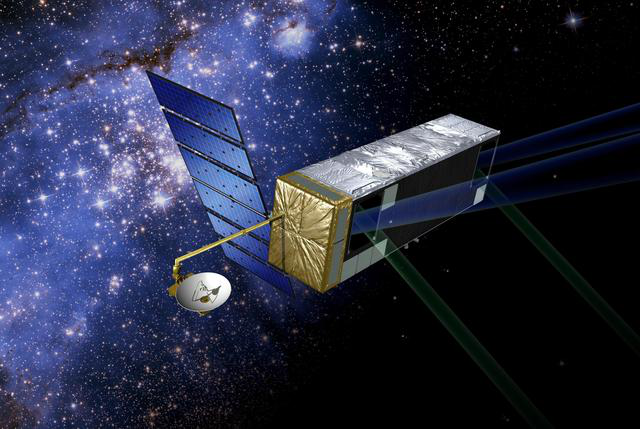

In [248]:
url=df['links'][0]
response = requests.get(url)
img = Image.open(BytesIO(response.content))

print(img.size)
img

In [252]:
df['description'][0]

'NASA Terrestrial Planet Finder will use multiple telescopes working together to take family portraits of stars and their orbiting planets and determine which planets may have the right chemistry to sustain life.'

(425, 640)


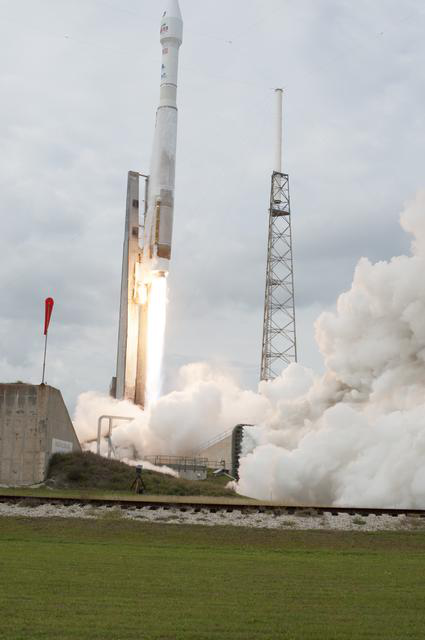

In [249]:
url=df['links'][1300]
response = requests.get(url)
img = Image.open(BytesIO(response.content))

print(img.size)
img

In [254]:
df['description'][1300]

"CAPE CANAVERAL, Fla. -- The United Launch Alliance Atlas V rocket carrying NASA's Mars Atmosphere and Volatile EvolutioN, or MAVEN, spacecraft soars off Space Launch Complex 41 on Cape Canaveral Air Force Station in Florida.    Launch was on schedule at 1:28 p.m. EST Nov. 18 at the opening of a two-hour launch window. After a 10-month journey to the Red Planet, MAVEN will study its upper atmosphere in unprecedented detail from orbit above the planet. Built by Lockheed Martin in Littleton, Colo., MAVEN will arrive at Mars in September 2014 and will be inserted into an elliptical orbit with a high point of 3,900 miles, swooping down to as close as 93 miles above the planet's surface. For more information, visit: http://www.nasa.gov/mission_pages/maven/main/index.html. Photo credit: NASA/Tony Gray and Rick Wetherington"

(640, 426)


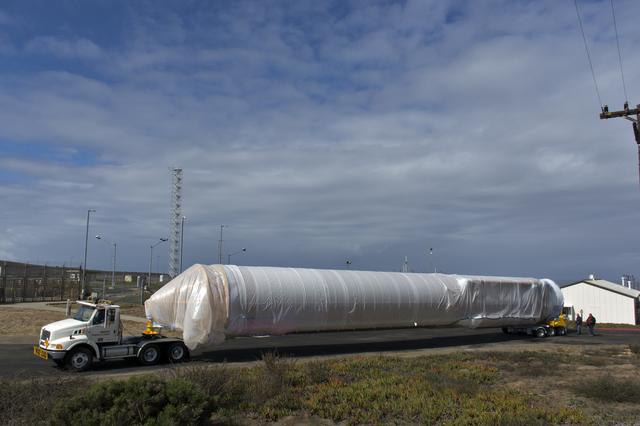

In [250]:
url=df['links'][1200]
response = requests.get(url)
img = Image.open(BytesIO(response.content))

print(img.size)
img.save()

In [255]:
df['description'][1200]

"A United Launch Alliance Atlas V booster is transported to Space Launch Complex 3 at Vandenberg Air Force Base in California. The rocket will launch NASA's Interior Exploration using Seismic Investigations, Geodesy and Heat Transport, or InSight, mission to land on Mars. InSight is the first mission to explore the Red Planet's deep interior. It will investigate processes that shaped the rocky planets of the inner solar system including Earth. Liftoff is scheduled for May 5, 2018."

In [24]:
l=[]
for i in range(1,60):
    for j in range(len(json.loads(responses[i].content)['collection']['items'])-1):
        l.append(json.loads(responses[i].content)['collection']['items'][j]['data'][0]['description'])

In [ ]:
df['description']= l

In [44]:
df.links[2].split('/')[-2]

'PIA14801'

In [45]:
m=[]
for i in range(len(df)):
    m.append(df.links[i].split('/')[-2])
df['name']=m    

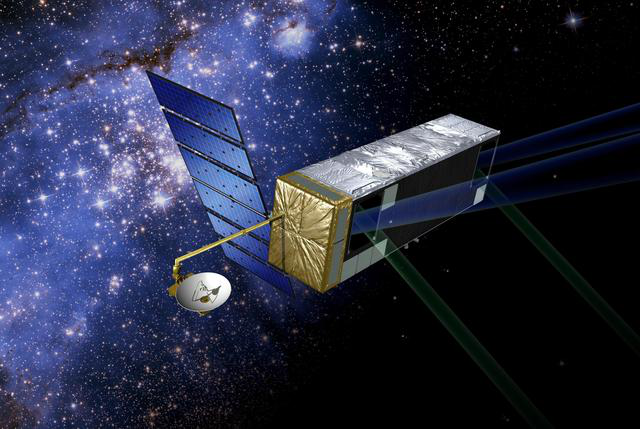

In [275]:
url=df['links'][0]
response = requests.get(url)
img = Image.open(BytesIO(response.content))

df['img'][0]

In [30]:
#will work but will take forever and you wont get your images out easily

#for i in range(len(df)):
#    url=df['links'][i]
#    response = requests.get(url)
#    img = Image.open(BytesIO(response.content))
#    df['img'][i]=img
#    

In [49]:
len(df.name.unique())==len(df)

True

In [52]:
df.head()

,links,description,name
0,https://images-assets.nasa.gov/image/PIA04499/...,NASA Terrestrial Planet Finder will use multip...,PIA04499
1,https://images-assets.nasa.gov/image/PIA09784/...,Planet in Repose,PIA09784
2,https://images-assets.nasa.gov/image/PIA14801/...,Sliver of a Planet,PIA14801
3,https://images-assets.nasa.gov/image/PIA06604/...,Fantastic Planet,PIA06604
4,https://images-assets.nasa.gov/image/PIA09844/...,Background Planet,PIA09844


In [50]:
#df.img[0].save(fp='/spacepictures',format='jpeg')

In [51]:
#for img in df.img:
#    img.save('/spacepictures')

In [53]:
img_dict={df.name[i]:df.links[i] for i in range(len(df))}
# Pull all images and store in pl_images directory

In [55]:
#img_dict.items()

In [57]:
from bs4 import BeautifulSoup as soup
#import requests
import urllib
#import pandas as pd
import numpy as np
#import json
from os import listdir
import PIL
#from PIL import Image
from PIL import ImageOps
from matplotlib import image

In [78]:
#for name, link in img_dict.items():
#    
#    image_file = open('spacepictures/' + name + ".jpeg", mode="xb")
#    image_file.write(urllib.request.urlopen(link).read())
#    image_file.close()

In [69]:
for i in range(len(df)):
    if 'GSFC-2014-10276-110' in df.links[i]:
        print(i)

1122


In [71]:
df.links[1122]

'https://images-assets.nasa.gov/image/GSFC-2014-10276-110 /GSFC-2014-10276-110 ~thumb.jpg'

In [76]:
len(list(img_dict.items())[1122:])

4657

In [80]:
#for name, link in list(img_dict.items())[1123:]:
#    
#    image_file = open('spacepictures/' + name + ".jpeg", mode="xb")
#    image_file.write(urllib.request.urlopen(link).read())
#    image_file.close()

In [79]:
for i in range(len(df)):
    if 'GSFC-2014-10276-033' in df.links[i]:
        print(i)

2318


In [84]:
list(img_dict.items())[2318:2319+1]

[('GSFC-2014-10276-033 ',
  'https://images-assets.nasa.gov/image/GSFC-2014-10276-033 /GSFC-2014-10276-033 ~thumb.jpg'),
 ('GSFC-2014-10276-045 copy',
  'https://images-assets.nasa.gov/image/GSFC-2014-10276-045 copy/GSFC-2014-10276-045 copy~thumb.jpg')]

In [88]:
#for name, link in list(img_dict.items())[2320:]:
#    
##    image_file = open('spacepictures/' + name + ".jpeg", mode="xb")
 #   image_file.write(urllib.request.urlopen(link).read())
 #   image_file.close()

In [87]:
img_dict

{'PIA04499': 'https://images-assets.nasa.gov/image/PIA04499/PIA04499~thumb.jpg',
 'PIA09784': 'https://images-assets.nasa.gov/image/PIA09784/PIA09784~thumb.jpg',
 'PIA14801': 'https://images-assets.nasa.gov/image/PIA14801/PIA14801~thumb.jpg',
 'PIA06604': 'https://images-assets.nasa.gov/image/PIA06604/PIA06604~thumb.jpg',
 'PIA09844': 'https://images-assets.nasa.gov/image/PIA09844/PIA09844~thumb.jpg',
 'PIA09917': 'https://images-assets.nasa.gov/image/PIA09917/PIA09917~thumb.jpg',
 'PIA09259': 'https://images-assets.nasa.gov/image/PIA09259/PIA09259~thumb.jpg',
 'GSFC_20171208_Archive_e002090': 'https://images-assets.nasa.gov/image/GSFC_20171208_Archive_e002090/GSFC_20171208_Archive_e002090~thumb.jpg',
 'PIA14354': 'https://images-assets.nasa.gov/image/PIA14354/PIA14354~thumb.jpg',
 'PIA16823': 'https://images-assets.nasa.gov/image/PIA16823/PIA16823~thumb.jpg',
 'PIA11518': 'https://images-assets.nasa.gov/image/PIA11518/PIA11518~thumb.jpg',
 'PIA07695': 'https://images-assets.nasa.gov/i